<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.177916,28.033326,69.959367,-80.875841,77.294768,231.488056,-154.193288
1,0.0,1.0,76.444416,70.187774,55.412675,-384.832171,-172.787306,169.714945,-342.502250
2,0.0,2.0,95.028703,41.509797,82.529989,-84.436705,144.631784,-24.853301,169.485085
3,0.0,3.0,81.073996,66.962934,78.740238,1070.434866,1307.212034,169.002699,1138.209335
4,0.0,4.0,51.692176,20.652551,58.958920,-178.514422,-37.210775,170.192626,-207.403400
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.584018,50.308289,22.564361,227.664202,391.120869,74.365719,316.755150
59996,999.0,56.0,29.094370,90.962964,35.109992,-742.459207,-577.291881,530.296489,-1107.588370
59997,999.0,57.0,76.235320,54.572002,45.755117,1030.226557,1216.788996,65.277374,1151.511622
59998,999.0,58.0,75.204545,29.190073,70.955549,-44.264190,141.085977,-76.294310,217.380287


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    50.177916  28.033326  69.959367   -80.875841    77.294768   
      1.0    76.444416  70.187774  55.412675  -384.832171  -172.787306   
      2.0    95.028703  41.509797  82.529989   -84.436705   144.631784   
      3.0    81.073996  66.962934  78.740238  1070.434866  1307.212034   
      4.0    51.692176  20.652551  58.958920  -178.514422   -37.210775   
...                ...        ...        ...          ...          ...   
999.0 55.0   80.584018  50.308289  22.564361   227.664202   391.120869   
      56.0   29.094370  90.962964  35.109992  -742.459207  -577.291881   
      57.0   76.235320  54.572002  45.755117  1030.226557  1216.788996   
      58.0   75.204545  29.190073  70.955549   -44.264190   141.085977   
      59.0   34.157477  35.840849  39.532071   259.826893   379.357290   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    231.488056  -154.193288  
      1.0    169.714945  -342.502250  
      2.0    -24.853301   169.485085  
      3.0    169.002699  1138.209335  
      4.0    170.192626  -207.403400  
...                 ...          ...  
999.0 55.0    74.365719   316.755150  
      56.0   530.296489 -1107.588370  
      57.0    65.277374  1151.511622  
      58.0   -76.294310   217.380287  
      59.0   289.682012    89.675278  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    50.177916  28.033326  69.959367   -80.875841    77.294768   
      1.0    76.444416  70.187774  55.412675  -384.832171  -172.787306   
      2.0    95.028703  41.509797  82.529989   -84.436705   144.631784   
      3.0    81.073996  66.962934  78.740238  1070.434866  1307.212034   
      4.0    51.692176  20.652551  58.958920  -178.514422   -37.210775   
...                ...        ...        ...          ...          ...   
999.0 55.0   80.584018  50.308289  22.564361   227.664202   391.120869   
      56.0   29.094370  90.962964  35.109992  -742.459207  -577.291881   
      57.0   76.235320  54.572002  45.755117  1030.226557  1216.788996   
      58.0   75.204545  29.190073  70.955549   -44.264190   141.085977   
      59.0   34.157477  35.840849  39.532071   259.826893   379.357290   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    231.488056  -154.193288  
      1.0    169.714945  -342.502250  
      2.0    -24.853301   169.485085  
      3.0    169.002699  1138.209335  
      4.0    170.192626  -207.403400  
...                 ...          ...  
999.0 55.0    74.365719   316.755150  
      56.0   530.296489 -1107.588370  
      57.0    65.277374  1151.511622  
      58.0   -76.294310   217.380287  
      59.0   289.682012    89.675278  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.177916,28.033326,69.959367,-80.875841,77.294768,231.488056,-154.193288
1,0.0,1.0,76.444416,70.187774,55.412675,-384.832171,-172.787306,169.714945,-342.502250
2,0.0,2.0,95.028703,41.509797,82.529989,-84.436705,144.631784,-24.853301,169.485085
3,0.0,3.0,81.073996,66.962934,78.740238,1070.434866,1307.212034,169.002699,1138.209335
4,0.0,4.0,51.692176,20.652551,58.958920,-178.514422,-37.210775,170.192626,-207.403400
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,80.584018,50.308289,22.564361,227.664202,391.120869,74.365719,316.755150
59996,999.0,56.0,29.094370,90.962964,35.109992,-742.459207,-577.291881,530.296489,-1107.588370
59997,999.0,57.0,76.235320,54.572002,45.755117,1030.226557,1216.788996,65.277374,1151.511622
59998,999.0,58.0,75.204545,29.190073,70.955549,-44.264190,141.085977,-76.294310,217.380287


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    50.177916  28.033326  69.959367   -80.875841    77.294768   
      1.0    76.444416  70.187774  55.412675  -384.832171  -172.787306   
      2.0    95.028703  41.509797  82.529989   -84.436705   144.631784   
      3.0    81.073996  66.962934  78.740238  1070.434866  1307.212034   
      4.0    51.692176  20.652551  58.958920  -178.514422   -37.210775   
...                ...        ...        ...          ...          ...   
999.0 55.0   80.584018  50.308289  22.564361   227.664202   391.120869   
      56.0   29.094370  90.962964  35.109992  -742.459207  -577.291881   
      57.0   76.235320  54.572002  45.755117  1030.226557  1216.788996   
      58.0   75.204545  29.190073  70.955549   -44.264190   141.085977   
      59.0   34.157477  35.840849  39.532071   259.826893   379.357290   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    231.488056  -154.193288  
      1.0    169.714945  -342.502250  
      2.0    -24.853301   169.485085  
      3.0    169.002699  1138.209335  
      4.0    170.192626  -207.403400  
...                 ...          ...  
999.0 55.0    74.365719   316.755150  
      56.0   530.296489 -1107.588370  
      57.0    65.277374  1151.511622  
      58.0   -76.294310   217.380287  
      59.0   289.682012    89.675278  

[60000 rows x 7 columns]

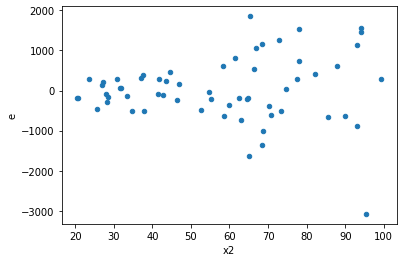

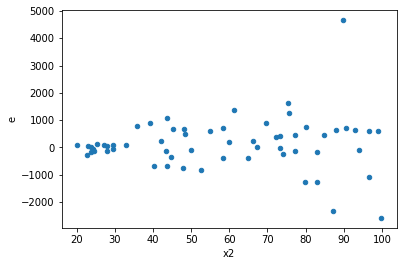

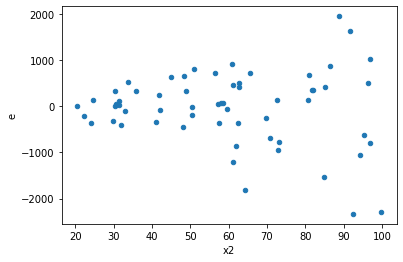

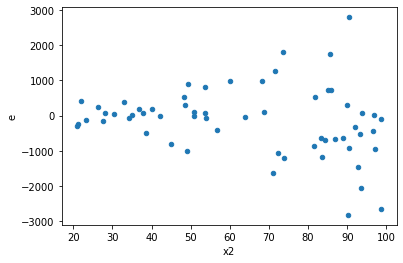

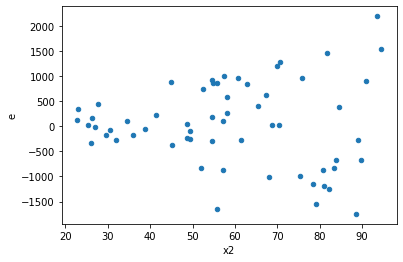

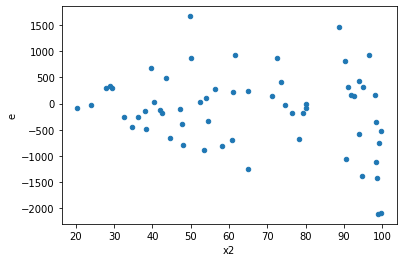

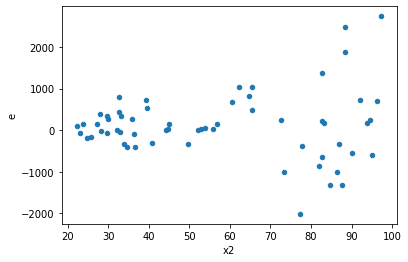

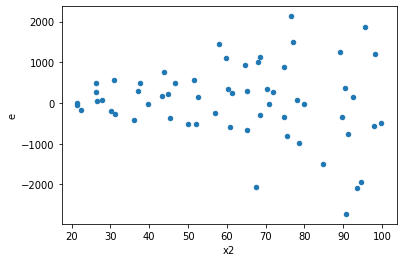

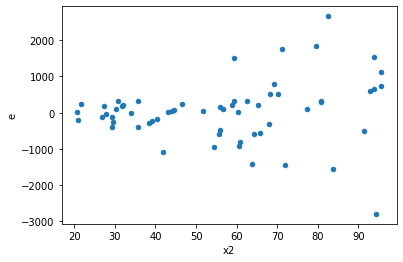

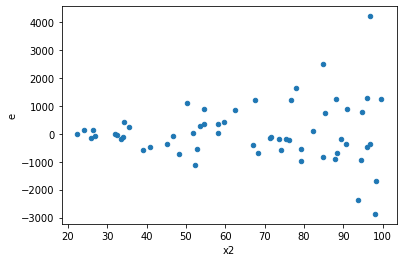

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,28.0,26.0,6997974.751904029,45660570.697164215,249927.6697108582,1756175.7960447776,7.026736167614017,3.5168036047750206e-06,0.9999982415981976,1.7584018023875103e-06,Reject001=0 : Heteroscedasticity
2.0,33.0,21.0,20798819.30591989,14753321.722229738,630267.2516945421,702539.1296299875,1.1146686230977965,0.808898837823605,0.5955505810881975,0.4044494189118025,Reject001=1 : Homoscedasticity
3.0,28.0,26.0,10380993.962112673,38028510.314288415,370749.7843611669,1462635.012088016,3.9450731295994124,0.0007364166535281935,0.9996317916732359,0.00036820832676409676,Reject001=0 : Heteroscedasticity
5.0,29.0,25.0,11092475.777306873,17136567.38554473,382499.1647347198,685462.6954217892,1.7920632477647058,0.14230187754636048,0.9288490612268198,0.07115093877318024,Reject001=1 : Homoscedasticity
6.0,34.0,20.0,3754568.8380289744,29644819.87244617,110428.49523614631,1482240.9936223084,13.422631454432151,9.714493653945055e-08,0.9999999514275317,4.857246826972528e-08,Reject001=0 : Heteroscedasticity
7.0,26.0,28.0,15211755.123566229,22360538.94343865,585067.5047525472,798590.6765513803,1.364954761740087,0.42080270079022175,0.7895986496048891,0.21040135039511088,Reject001=1 : Homoscedasticity
8.0,29.0,25.0,12909076.400900807,26786116.049482763,445140.5655483037,1071444.6419793104,2.406980457194581,0.028653278501234114,0.9856733607493829,0.014326639250617057,Reject001=1 : Homoscedasticity
10.0,23.0,31.0,7749003.111096317,39358225.91003469,336913.17874331813,1269620.1906462803,3.7683898130133926,0.0007071617003029385,0.9996464191498485,0.00035358085015146923,Reject001=0 : Heteroscedasticity
11.0,20.0,34.0,5189998.590818858,27672727.218216524,259499.9295409429,813903.7417122507,3.1364314555000146,0.003258190459378474,0.9983709047703108,0.001629095229689237,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,32.0,22.0,26170612.48356247,9848930.143367404,817831.6401113272,447678.64288033656,0.5473970691808847,0.11745381201850083,Reject001=1 : Homoscedasticity
1.0,28.0,26.0,6997974.751904029,45660570.697164215,249927.6697108582,1756175.7960447776,7.026736167614017,3.5168036047750206e-06,Reject001=0 : Heteroscedasticity
2.0,33.0,21.0,20798819.30591989,14753321.722229738,630267.2516945421,702539.1296299875,1.1146686230977965,0.808898837823605,Reject001=1 : Homoscedasticity
3.0,28.0,26.0,10380993.962112673,38028510.314288415,370749.7843611669,1462635.012088016,3.9450731295994124,0.0007364166535281935,Reject001=0 : Heteroscedasticity
4.0,27.0,27.0,18590320.45295739,16787332.028530426,688530.38714657,621753.0380937195,0.9030146667460948,0.7928990017523577,Reject001=1 : Homoscedasticity
5.0,29.0,25.0,11092475.777306873,17136567.38554473,382499.1647347198,685462.6954217892,1.7920632477647058,0.14230187754636048,Reject001=1 : Homoscedasticity
6.0,34.0,20.0,3754568.8380289744,29644819.87244617,110428.49523614631,1482240.9936223084,13.422631454432151,9.714493653945055e-08,Reject001=0 : Heteroscedasticity
7.0,26.0,28.0,15211755.123566229,22360538.94343865,585067.5047525472,798590.6765513803,1.364954761740087,0.42080270079022175,Reject001=1 : Homoscedasticity
8.0,29.0,25.0,12909076.400900807,26786116.049482763,445140.5655483037,1071444.6419793104,2.406980457194581,0.028653278501234114,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      559
Reject001=0 : Heteroscedasticity    441
Name: Result_test, dtype: int64